In [1]:
import numpy as np
import pandas as pd

house_test = pd.read_csv("test.csv", sep=",")
house_train = pd.read_csv("train.csv", sep=",")

In [2]:
house_train.shape #(1460,81)
house_test.shape #(1459,80)
house_train.columns.sort_values()
house_test.columns.sort_values() 

corr_train=house_train.select_dtypes(include=["float64","int64"]).corr()
corr_train["SalePrice"].sort_values()

"""
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
"""

'\nTotalBsmtSF      0.613581\nGarageArea       0.623431\nGarageCars       0.640409\nGrLivArea        0.708624\nOverallQual      0.790982\n'

In [3]:
house_train.info()
house_train.describe()
NA_values_train=(1460-house_train.describe(include="all").loc["count",:])
NA_values_train[NA_values_train > 0].sort_index()

"""Alley           1369
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
BsmtQual           37
Electrical          1 ?
Fence            1179
FireplaceQu       690
GarageCond         81
GarageFinish       81
GarageQual         81
GarageType         81
GarageYrBlt      81.0
LotFrontage     259.0
MasVnrArea        8.0
MasVnrType        872
MiscFeature      1406
PoolQC           1453
"""

#house_train.columns[house_train.isnull().any()].sort_values()

"""
'Alley':Type of alley access to property, categorical, missing:1369, filling:NoAlley
'BsmtCond':Evaluates the general condition of the basement,categorical, missing:37, filling:NoBasement
'BsmtExposure':Refers to walkout or garden level walls,categorical, missing:38, filling:NoBasement
'BsmtFinType1':Rating of basement finished area, missing:37,categorical, filling:NoBasement
'BsmtFinType2':Rating of basement finished area (if multiple types),categorical, missing:38, filling:NoBasement
'BsmtQual':Evaluates the height of the basement,categorical, missing:37, filling:NoBasement
'Electrical':Electrical system, missing:1 we need to look
'Fence':Fence quality, categorical, missing:1179, filling:NoFence
'FireplaceQu':Fireplace quality,categorical, missing:690, filling:NoFireplace
'GarageCond':Garage condition,categorical, missing:81, filling:NoGarage
'GarageFinish':Interior finish of the garage, categorical, missing:81, filling:NoGarage
'GarageQual':Garage quality, categorical, missing:81, filling:NoGarage
'GarageType':Garage location, categorical, missing:81, filling:NoGarage
'GarageYrBlt':Year garage was built, float, missing:81, filling:if garage type No Garage then 0 : else median
'LotFrontage':Linear feet of street connected to property, float, missing:259, filling:median for neighbourhood
'MasVnrArea':Masonry veneer area in square feet, float, missing:8, if masvnt type No then 0 : else median
'MasVnrType', Masonry veneer type, categorical, missing:872, filling:NoVeneer
'MiscFeature':Miscellaneous feature not covered in other categories, categorical, missing:1406, filling:None
'PoolQC':Pool quality, categorical, missing:1453, filling:NoPool
"""

house_train_fixed=house_train.copy()

#categorical
house_train_fixed["Alley"]=house_train_fixed["Alley"].fillna("NoAlley")
house_train_fixed["BsmtCond"]=house_train_fixed["BsmtCond"].fillna("NoBasement")
house_train_fixed["BsmtExposure"]=house_train_fixed["BsmtExposure"].fillna("NoBasement")
house_train_fixed["BsmtFinType1"]=house_train_fixed["BsmtFinType1"].fillna("NoBasement")
house_train_fixed["BsmtFinType2"]=house_train_fixed["BsmtFinType2"].fillna("NoBasement")
house_train_fixed["BsmtQual"]=house_train_fixed["BsmtQual"].fillna("NoBasement")
house_train_fixed["Fence"]=house_train_fixed["Fence"].fillna("NoFence")
house_train_fixed["FireplaceQu"]=house_train_fixed["FireplaceQu"].fillna("NoFireplace")
house_train_fixed["GarageCond"]=house_train_fixed["GarageCond"].fillna("NoGarage")
house_train_fixed["GarageFinish"]=house_train_fixed["GarageFinish"].fillna("NoGarage")
house_train_fixed["GarageQual"]=house_train_fixed["GarageQual"].fillna("NoGarage")
house_train_fixed["GarageType"]=house_train_fixed["GarageType"].fillna("NoGarage")
house_train_fixed["MasVnrType"]=house_train_fixed["MasVnrType"].fillna("NoVeneer")
house_train_fixed["MiscFeature"]=house_train_fixed["MiscFeature"].fillna("None")
house_train_fixed["PoolQC"]=house_train_fixed["PoolQC"].fillna("NoPool")

house_train_fixed["GarageYrBlt"].dtypes
#then numeric

house_train_fixed.loc[house_train_fixed["GarageType"] == "NoGarage", "GarageYrBlt"]= 0
house_train_fixed.loc[house_train_fixed["GarageYrBlt"].isnull(), "GarageYrBlt"] = house_train_fixed["GarageYrBlt"].median()
house_train_fixed["LotFrontage"]=house_train_fixed["LotFrontage"].fillna(house_train_fixed.groupby("Neighborhood")["LotFrontage"].transform("median"))
house_train_fixed.loc[house_train_fixed["MasVnrType"]=="NoVeneer" , "MasVnrArea"]= 0
house_train_fixed.loc[house_train_fixed["MasVnrArea"].isnull(), "MasVnrArea"] = house_train_fixed["MasVnrArea"].median()

house_train_fixed["Electrical"] = house_train_fixed["Electrical"].fillna("Unknown")

house_train_fixed.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [4]:
house_test.info()
house_test.describe()
NA_values_test=(1459-house_test.describe(include="all").loc["count",:])
NA_values_test[NA_values_test > 0].sort_index()

"""Alley         1352
BsmtCond           45
BsmtExposure       44
BsmtFinSF1        1.0
BsmtFinSF2        1.0
BsmtFinType1       42
BsmtFinType2       42
BsmtFullBath      2.0
BsmtHalfBath      2.0
BsmtQual           44
BsmtUnfSF         1.0
Exterior1st         1
Exterior2nd         1
Fence            1169
FireplaceQu       730
Functional          2
GarageArea        1.0
GarageCars        1.0
GarageCond         78
GarageFinish       78
GarageQual         78
GarageType         76
GarageYrBlt      78.0
KitchenQual         1
LotFrontage     227.0
MSZoning            4
MasVnrArea       15.0
MasVnrType        894
MiscFeature      1408
PoolQC           1456
SaleType            1
TotalBsmtSF       1.0
Utilities           2
"""

"""
'Alley':Type of alley access to property, categorical, missing:1352, filling:NoAlley
'BsmtCond':Evaluates the general condition of the basement,categorical, missing:45, filling:NoBasement
'BsmtExposure':Refers to walkout or garden level walls,categorical, missing:44, filling:NoBasement
'BsmtFinType1':Rating of basement finished area, missing:42,categorical, filling:NoBasement
'BsmtFinType2':Rating of basement finished area (if multiple types),categorical, missing:42, filling:NoBasement
'BsmtFinSF1': Type 1 finished square feet,float,missing:1
'BsmtFinSF2': Type 2 finished square feet,float,missing:1
'BsmtFullBath': Basement full bathrooms,float, missing:2, filling: if there is batch then median else 0
'BsmtHalfBath': Basement half bathrooms, float missing:2, filling: if there is batch then median else 0
'BsmtQual':Evaluates the height of the basement,categorical, missing:44, filling:NoBasement
'BsmtUnfSF': Unfinished square feet of basement area,float,missing:1, filling:
'Exterior1st':Exterior covering on house,categorical,missing:1, filling:NoExt
'Exterior2nd':Exterior covering on house (if more than one material),categorical,missing:1,filling:NoExt
'Fence':Fence quality, categorical, missing:1169, filling:NoFence
'FireplaceQu':Fireplace quality,categorical, missing:730, filling:NoFireplace
'Functional': Home functionality (Assume typical unless deductions are warranted),categorical,missing:2, filling:NoFunc
'GarageArea':Size of garage in square feet,float,missing:1, filling if there is garagetype then median else 0
'GarageCars':Size of garage in car capacity,float,missing:1, filling if there is garagetype then median else 0
'GarageCond':Garage condition,categorical, missing:78, filling:NoGarage
'GarageFinish':Interior finish of the garage, categorical, missing:78, filling:NoGarage
'GarageQual':Garage quality, categorical, missing:78, filling:NoGarage
'GarageType':Garage location, categorical, missing:76, filling:NoGarage
'GarageYrBlt':Year garage was built, float, missing:78, filling:if garage type No Garage then 0 : else median
'KitchenQual':Kitchen quality,categorical, missing:1
'LotFrontage':Linear feet of street connected to property, float, missing:227, filling:median for neighbourhood
'MSZoning':Identifies the general zoning classification of the sale.,categorical,missing:4, filling:Unkown
'MasVnrArea':Masonry veneer area in square feet, float, missing:15, if masvnr type No then 0 : else median
'MasVnrType', Masonry veneer type, categorical, missing:894, filling:NoVeneer
'MiscFeature':Miscellaneous feature not covered in other categories, categorical, missing:1408, filling:None
'PoolQC':Pool quality, categorical, missing:1456, filling:NoPool
'SaleType':Type of sale,categorical,missing:1.filling: delete because there is option the other
'TotalBsmtSF':Total square feet of basement area,float,missing:1, filling:
'Utilities':Type of utilities available,categorical,missing:2, filling:NoUtils
"""

house_test_fixed=house_test.copy()
house_test_fixed.loc[house_test_fixed["BsmtFinSF1"].isna(),"Id"] #2121
house_test_fixed.loc[house_test_fixed["BsmtFinSF2"].isna(),"Id"] #2121
house_test_fixed.loc[house_test_fixed["BsmtFullBath"].isna(),"Id"] #2121 2189
house_test_fixed.loc[house_test_fixed["BsmtHalfBath"].isna(),"Id"] #2121 2189
house_test_fixed.loc[house_test_fixed["BsmtUnfSF"].isna(),"Id"] #2121
house_test_fixed.loc[house_test_fixed["Exterior1st"].isna(),"Id"] #2152
house_test_fixed.loc[house_test_fixed["Exterior2nd"].isna(),"Id"] #2152
house_test_fixed.loc[house_test_fixed["Functional"].isna(),"Id"] #2217 2474
house_test_fixed.loc[house_test_fixed["GarageArea"].isna(),"Id"] #2577
house_test_fixed.loc[house_test_fixed["GarageCars"].isna(),"Id"] #2577
house_test_fixed.loc[house_test_fixed["KitchenQual"].isna(),"Id"] #1556
house_test_fixed.loc[house_test_fixed["SaleType"].isna(),"Id"] #2490
house_test_fixed.loc[house_test_fixed["TotalBsmtSF"].isna(),"Id"] #2121
house_test_fixed.loc[house_test_fixed["TotalBsmtSF"].isna(),"Id"] #1916 1946

house_test_fixed[house_test_fixed["Utilities"].isnull()].sort_values("Utilities") 
house_test_fixed.loc[95,["KitchenAbvGr","KitchenQual"]] #there is a kitchen then can fill unknown

#categorical
house_test_fixed["Alley"]=house_test_fixed["Alley"].fillna("NoAlley")
house_test_fixed["BsmtCond"]=house_test_fixed["BsmtCond"].fillna("NoBasement")
house_test_fixed["BsmtExposure"]=house_test_fixed["BsmtExposure"].fillna("NoBasement")
house_test_fixed["BsmtFinType1"]=house_test_fixed["BsmtFinType1"].fillna("NoBasement")
house_test_fixed["BsmtFinType2"]=house_test_fixed["BsmtFinType2"].fillna("NoBasement")
house_test_fixed["BsmtQual"]=house_test_fixed["BsmtQual"].fillna("NoBasement")
house_test_fixed["Fence"]=house_test_fixed["Fence"].fillna("NoFence")
house_test_fixed["FireplaceQu"]=house_test_fixed["FireplaceQu"].fillna("NoFireplace")
house_test_fixed["GarageCond"]=house_test_fixed["GarageCond"].fillna("NoGarage")
house_test_fixed["GarageFinish"]=house_test_fixed["GarageFinish"].fillna("NoGarage")
house_test_fixed["GarageQual"]=house_test_fixed["GarageQual"].fillna("NoGarage")
house_test_fixed["GarageType"]=house_test_fixed["GarageType"].fillna("NoGarage")
house_test_fixed["KitchenQual"]=house_test_fixed["KitchenQual"].fillna("Unknown")
house_test_fixed["MSZoning"]=house_test_fixed["MSZoning"].fillna("Unknown")
house_test_fixed["MasVnrType"]=house_test_fixed["MasVnrType"].fillna("NoVeneer")
house_test_fixed["MiscFeature"]=house_test_fixed["MiscFeature"].fillna("None")
house_test_fixed["PoolQC"]=house_test_fixed["PoolQC"].fillna("NoPool")
house_test_fixed["Utilities"]=house_test_fixed["Utilities"].fillna("NoUtils")

#numeric
house_test_fixed.loc[house_test_fixed["BsmtQual"] == "NoBasement", "BsmtFullBath"] = 0
house_test_fixed.loc[house_test_fixed["BsmtFullBath"].isnull(), "BsmtFullBath"] = house_train_fixed["BsmtFullBath"].median()
house_test_fixed.loc[house_test_fixed["BsmtQual"] == "NoBasement", "BsmtHalfBath"] = 0
house_test_fixed.loc[house_test_fixed["BsmtHalfBath"].isnull(), "BsmtHalfBath"] = house_train_fixed["BsmtFullBath"].median()
house_test_fixed.loc[house_test_fixed["GarageType"] == "NoGarage", "GarageArea"] = 0
house_test_fixed.loc[house_test_fixed["GarageArea"].isnull(), "GarageArea"] = house_train_fixed["GarageArea"].median()
house_test_fixed.loc[house_test_fixed["GarageType"] == "NoGarage", "GarageCars"] = 0
house_test_fixed.loc[house_test_fixed["GarageCars"].isnull(), "GarageCars"] = house_train_fixed["GarageCars"].median()
house_test_fixed.loc[house_test_fixed["GarageType"] == "NoGarage", "GarageYrBlt"] = 0
house_test_fixed.loc[house_test_fixed["GarageYrBlt"].isnull(), "GarageYrBlt"] = house_train_fixed["GarageYrBlt"].median()
house_test_fixed["LotFrontage"]=house_test_fixed["LotFrontage"].fillna(house_train_fixed.groupby("Neighborhood")["LotFrontage"].transform("median"))
house_test_fixed.loc[house_test_fixed["MasVnrType"] == "NoVeneer", "MasVnrArea"] = 0
house_test_fixed.loc[house_test_fixed["MasVnrArea"].isnull(), "MasVnrArea"] = house_train_fixed["MasVnrArea"].median()

numeric_cols = house_test_fixed.select_dtypes(include=["float64", "int64"]).columns
house_test_fixed[numeric_cols] = house_test_fixed[numeric_cols].fillna(house_train_fixed[numeric_cols].median())

object_cols = house_test_fixed.select_dtypes(include="object").columns
house_test_fixed[object_cols] = house_test_fixed[object_cols].fillna("Unknown")

house_test_fixed.isnull().sum().sort_values()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [5]:
from scipy.stats import zscore
train_z_score=np.abs(zscore(house_train_fixed["SalePrice"]))
house_train_fixed[train_z_score>3].count() #22
train_z_score_all=np.abs(zscore(house_train_fixed.select_dtypes(include=["float64","int64"])))
train_z_score_all = pd.DataFrame(data=train_z_score_all, columns=house_train_fixed.select_dtypes(include=["float64","int64"]).columns, index=house_train_fixed.index)

house_train_fixed[train_z_score_all > 3].count().sort_values(ascending=False) #22
house_train_fixed[train_z_score_all>3].count(axis=1).sort_values(ascending=False)

print(house_train_fixed[train_z_score_all>3].count(axis=1).sort_values(ascending=False)) #1299 1183 186 770
a=house_train_fixed[train_z_score_all>3].loc[1298]
print(a[a>=0], end="\n") #pool area, garage and house is big compared to another one
b=house_train_fixed[train_z_score_all>3].loc[1182]
print(b[b>0], end="\n") #same first and second floor is big than house price is rises
c=house_train_fixed[train_z_score_all>3].loc[185]
print(c[c>0], end="\n") #quilty so good 9 and lot of rooms 12 above the grade normally price is high
d=house_train_fixed[train_z_score_all>3].loc[769]
print(d[d>0], end="\n") #big house lot of rooms 12 and high price

1298    13
1182     8
691      7
635      7
185      7
        ..
1447     0
1446     0
1444     0
1443     0
18       0
Length: 1460, dtype: int64
LotFrontage       313.0
LotArea         63887.0
MasVnrArea        796.0
BsmtFinSF1       5644.0
TotalBsmtSF      6110.0
1stFlrSF         4692.0
GrLivArea        5642.0
BsmtFullBath        2.0
TotRmsAbvGrd       12.0
Fireplaces          3.0
GarageArea       1418.0
OpenPorchSF       292.0
PoolArea          480.0
Name: 1298, dtype: object
LotFrontage       160.0
BsmtFinSF1       2096.0
TotalBsmtSF      2396.0
1stFlrSF         2411.0
2ndFlrSF         2065.0
GrLivArea        4476.0
PoolArea          555.0
SalePrice      745000.0
Name: 1182, dtype: object
OverallCond          9.0
LowQualFinSF       572.0
GrLivArea         3608.0
TotRmsAbvGrd        12.0
OpenPorchSF        260.0
ScreenPorch        410.0
SalePrice       475000.0
Name: 185, dtype: object
LotArea          53504.0
GrLivArea         3279.0
TotRmsAbvGrd        12.0
WoodDeckSF         50

In [6]:
house_train_fixed.info()
house_train_fixed["MSSubClass"].head() #this not int categorical
house_train_fixed["MSSubClass"]=house_train_fixed["MSSubClass"].astype("object")
house_train_fixed["OverallQual"]=house_train_fixed["OverallQual"].astype("object")
house_train_fixed["OverallCond"]=house_train_fixed["OverallCond"].astype("object")

house_test_fixed.info()
house_test_fixed["MSSubClass"]=house_test_fixed["MSSubClass"].astype("object")
house_test_fixed["OverallQual"]=house_test_fixed["OverallQual"].astype("object")
house_test_fixed["OverallCond"]=house_test_fixed["OverallCond"].astype("object")

house_train_fixed = house_train_fixed.drop("Id", axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

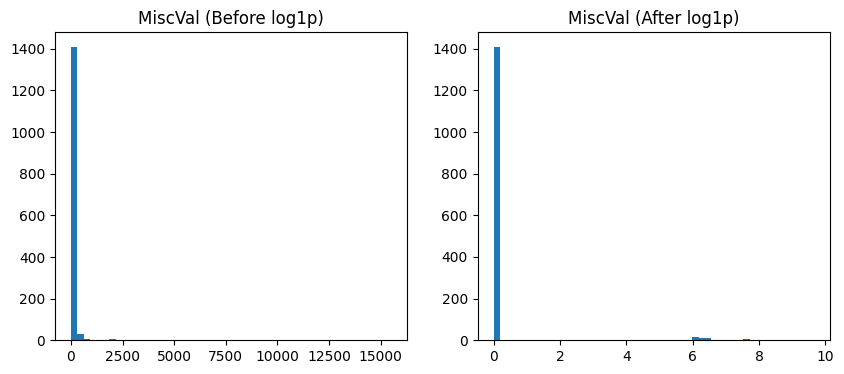

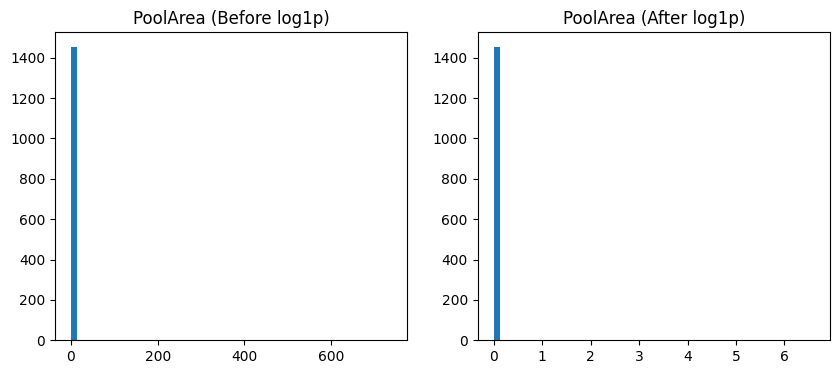

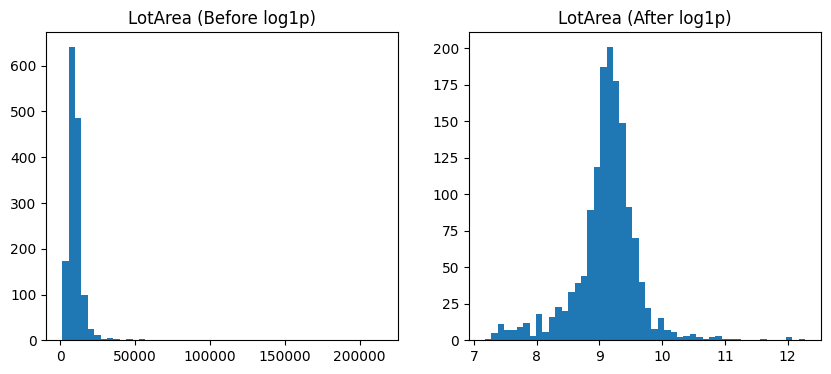

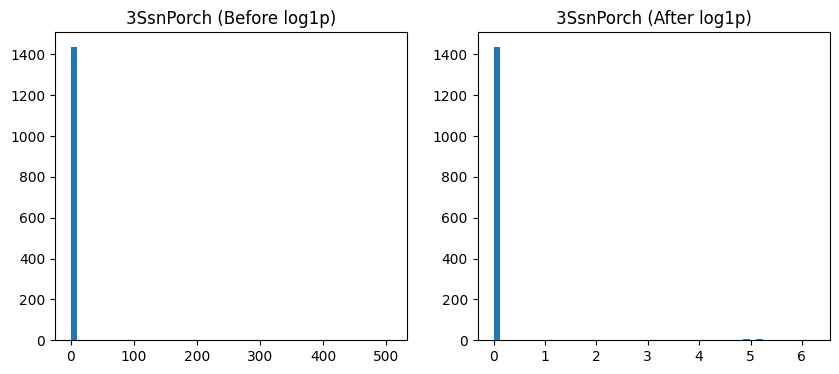

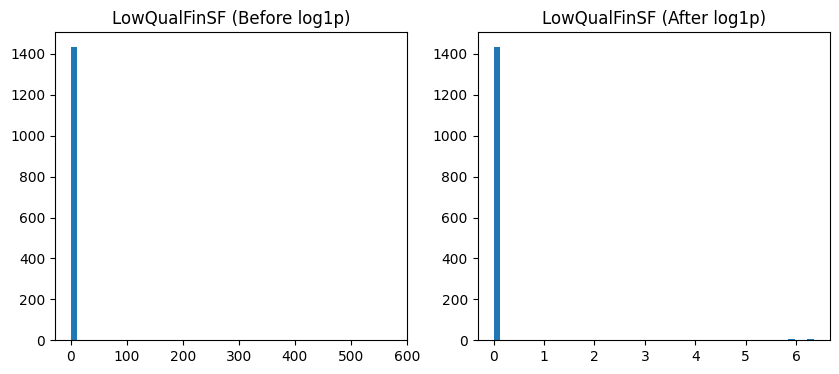

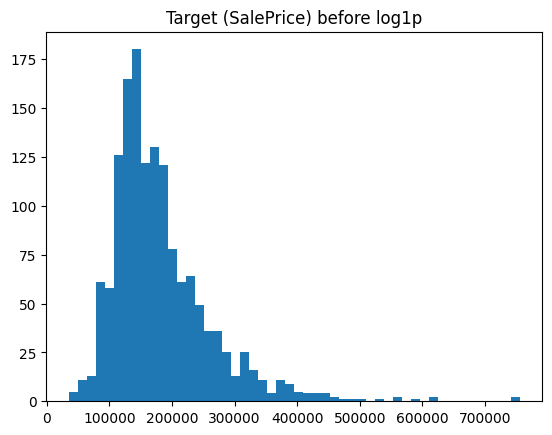

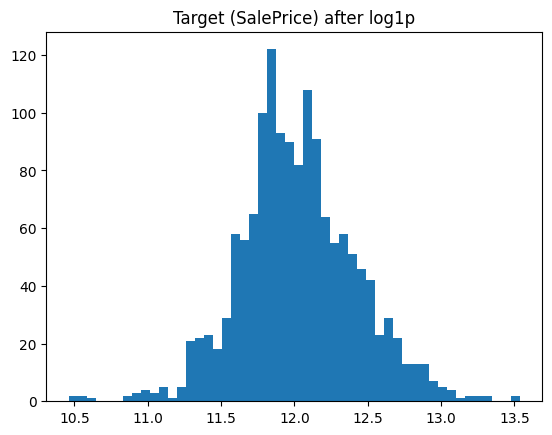

In [7]:
Y = house_train_fixed["SalePrice"].copy()
house_train_fixed=house_train_fixed.drop("SalePrice",axis=1)

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

skewness_train = {}

# ---- TRAIN ----
for column in house_train_fixed.select_dtypes(include=[np.number]).columns:
    skewness = skew(house_train_fixed[column])
    skewness_train[column] = skewness
    if np.abs(skewness) > 0.75:
        house_train_fixed[column] = np.log1p(house_train_fixed[column].astype("float64"))
        house_test_fixed[column] = np.log1p(house_test_fixed[column].astype("float64"))

# First 5
top_skewed = sorted(skewness_train.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

for col, sk in top_skewed:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    # Before transform
    axes[0].hist(np.expm1(house_train_fixed[col]), bins=50)  
    axes[0].set_title(f"{col} (Before log1p)")

    # After transform
    axes[1].hist(house_train_fixed[col], bins=50)
    axes[1].set_title(f"{col} (After log1p)")

    plt.show()

# ---- Target (SalePrice) ----

plt.hist(Y, bins=50)
plt.title("Target (SalePrice) before log1p")
plt.show()

Y_log = np.log1p(Y)
plt.hist(Y_log, bins=50)
plt.title("Target (SalePrice) after log1p")
plt.show()

In [8]:
#feature engineering
house_train_fixed["Total_Baths"]=house_train_fixed["BsmtFullBath"] + house_train_fixed["BsmtHalfBath"] + house_train_fixed["FullBath"] + house_train_fixed["HalfBath"]
house_train_fixed["Total_Porch_Area"] = house_train_fixed["OpenPorchSF"] + house_train_fixed["EnclosedPorch"] + house_train_fixed["3SsnPorch"] + house_train_fixed["ScreenPorch"]
house_train_fixed["Total_Area"] = house_train_fixed["GrLivArea"] +house_train_fixed["TotalBsmtSF"]

house_test_fixed["Total_Baths"]=house_test_fixed["BsmtFullBath"] + house_test_fixed["BsmtHalfBath"] + house_test_fixed["FullBath"] + house_test_fixed["HalfBath"]
house_test_fixed["Total_Porch_Area"] = house_test_fixed["OpenPorchSF"] + house_test_fixed["EnclosedPorch"] + house_test_fixed["3SsnPorch"] + house_test_fixed["ScreenPorch"]
house_test_fixed["Total_Area"] = house_test_fixed["GrLivArea"] + house_test_fixed["TotalBsmtSF"]

In [9]:
#binary features
house_train_fixed["IsRemodelling"] = np.where((house_train_fixed["YearRemodAdd"] - house_train_fixed["YearBuilt"]) >0,1,0)
house_train_fixed["IsBasement"] = np.where(house_train_fixed["TotalBsmtSF"] > 0,1,0)
house_train_fixed["IsGarage"] = np.where(house_train_fixed["GarageArea"] > 0,1,0)
house_train_fixed["IsPool"] = np.where(house_train_fixed["PoolArea"] > 0,1,0)

house_test_fixed["IsRemodelling"] = np.where((house_test_fixed["YearRemodAdd"] - house_test_fixed["YearBuilt"]) >0,1,0)
house_test_fixed["IsBasement"] = np.where(house_test_fixed["TotalBsmtSF"] > 0,1,0)
house_test_fixed["IsGarage"] = np.where(house_test_fixed["GarageArea"] > 0,1,0)
house_test_fixed["IsPool"] = np.where(house_test_fixed["PoolArea"] > 0,1,0)

In [10]:
#turn to categorical variables to binary
test_ids = house_test_fixed["Id"]

house_train_fixed=pd.get_dummies(house_train_fixed,drop_first=True,dtype="int64")
house_test_fixed=pd.get_dummies(house_test_fixed,drop_first=True,dtype="int64")
house_train_fixed, house_test_fixed = house_train_fixed.align(house_test_fixed, join="left", axis=1, fill_value=0)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = house_train_fixed
y = Y_log  

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

VIF = pd.DataFrame()
VIF["feature"] = X_train_scaled.columns
VIF["value"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(VIF)

C:\Users\ŞEVVAL.DESKTOP-5G7F1LQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ŞEVVAL.DESKTOP-5G7F1LQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                   feature       value
0              LotFrontage    4.258537
1                  LotArea    6.987749
2                YearBuilt   20.929240
3             YearRemodAdd    4.743963
4               MasVnrArea   35.467076
..                     ...         ...
290  SaleCondition_AdjLand    1.950000
291   SaleCondition_Alloca    2.034601
292   SaleCondition_Family    1.626707
293   SaleCondition_Normal    4.078698
294  SaleCondition_Partial  128.417036

[295 rows x 2 columns]


In [12]:
print(X_train_scaled[X_train_scaled.values==np.nan].count().sort_values(ascending=False))

LotFrontage              0
LotArea                  0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 295, dtype: int64


In [13]:
high_vif_cols = VIF[VIF['value'].isna() | (VIF['value'] > 10)]['feature'].tolist()

X_train_scaled = X_train_scaled.drop(columns=high_vif_cols)
X_test_scaled = X_test_scaled.drop(columns=high_vif_cols)

VIF_new = pd.DataFrame()
VIF_new["feature"] = X_train_scaled.columns
VIF_new["value"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print(VIF_new)

                   feature     value
0              LotFrontage  3.167286
1                  LotArea  3.918276
2             YearRemodAdd  2.788998
3                BsmtUnfSF  2.035600
4             LowQualFinSF  1.786657
..                     ...       ...
139            SaleType_WD  3.093861
140  SaleCondition_AdjLand  1.382764
141   SaleCondition_Alloca  1.366523
142   SaleCondition_Family  1.379034
143   SaleCondition_Normal  3.058283

[144 rows x 2 columns]


In [14]:
from sklearn.linear_model import LinearRegression,Lasso
linear_model =LinearRegression()
lin_reg = linear_model.fit(X_train_scaled,y_train)
lin_pred=lin_reg.predict(X_test_scaled)

rmse=root_mean_squared_error(y_test,lin_pred)
rsquared=r2_score(y_test,lin_pred)

lin_reg_metrics=[rmse,rsquared]

print(f"For linear reg rmse is {lin_reg_metrics[0]} and r2_score is {lin_reg_metrics[1]}")

For linear reg rmse is 0.18597443777012546 and r2_score is 0.8146599417032014


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import xgboost as xgb

lasso_param_grid={ "alpha":np.logspace(-4, 1, 50)}

grid_lasso = GridSearchCV(Lasso(),lasso_param_grid,cv=5,scoring="r2")
grid_lasso.fit(X_train_scaled,y_train)
lasso_pred=grid_lasso.predict(X_test_scaled)

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3,5],
    "learning_rate": [0.05, 0.1]}

grid_xgb = GridSearchCV(xgb.XGBRegressor(),xgb_param_grid,cv=3,scoring="r2")
grid_xgb.fit(X_train,y_train)
xgb_pred=grid_xgb.predict(X_test)

rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42),rf_param_grid,cv=3,scoring="r2")
grid_rf.fit(X_train,y_train)
rf_pred=grid_rf.predict(X_test)

gbr_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]}

grid_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),gbr_param_grid,cv=3,scoring="r2")
grid_gbr.fit(X_train, y_train)
gbr_pred=grid_gbr.predict(X_test)

In [16]:
est =["NaN",grid_lasso.best_estimator_,grid_xgb.best_estimator_,grid_rf.best_estimator_,grid_gbr.best_estimator_]
rmseror=[root_mean_squared_error(y_test,lin_pred),root_mean_squared_error(y_test,lasso_pred),root_mean_squared_error(y_test,xgb_pred),root_mean_squared_error(y_test,rf_pred),root_mean_squared_error(y_test,gbr_pred)]
r_square=[r2_score(y_test,lin_pred),r2_score(y_test,lasso_pred),r2_score(y_test,xgb_pred),r2_score(y_test,rf_pred),r2_score(y_test,gbr_pred)]

names=["LinReg","Lasso","RF","GBR","XGBR"]
index=["est","rmse","r2_score"]

metrics = pd.DataFrame({"RMSE": rmseror,"R²": r_square},index=names)
metrics["RMSE"] = metrics["RMSE"].round(4)
metrics["R²"] = metrics["R²"].round(4)

print(metrics)

          RMSE      R²
LinReg  0.1860  0.8147
Lasso   0.1851  0.8165
RF      0.1440  0.8889
GBR     0.1583  0.8657
XGBR    0.1432  0.8901


In [17]:
xgb_pred_test=grid_xgb.predict(house_test_fixed)
print(xgb_pred_test)

[11.692338 11.928372 12.219776 ... 12.032659 11.740036 12.2877  ]


In [18]:
house_test_fixed["Id"] = test_ids

test_norm=np.expm1(xgb_pred_test)

SalePrice_pred=pd.DataFrame({"Id":house_test_fixed["Id"],"SalePrice":test_norm})

SalePrice_pred.to_csv("SalePrice",index=False)